In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_excel('data.xlsx')

In [19]:
df.head()

,result,tactic
0,1:2,4-4-2 double 6
1,6:1,4-4-2 double 6
2,4:1,4-1-4-1
3,1:0,4-2-3-1
4,0:0,4-2-3-1


In [20]:
df['gf']=df['result'].apply(lambda x:x.split(':')[0])
df['ga']=df['result'].apply(lambda x:x.split(':')[1])

In [21]:
df.head()

,result,tactic,gf,ga
0,1:2,4-4-2 double 6,1,2
1,6:1,4-4-2 double 6,6,1
2,4:1,4-1-4-1,4,1
3,1:0,4-2-3-1,1,0
4,0:0,4-2-3-1,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   result  101 non-null    object
 1   tactic  101 non-null    object
 2   gf      101 non-null    object
 3   ga      101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [23]:
df['gf']=df['gf'].astype(int)
df['ga']=df['ga'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   result  101 non-null    object
 1   tactic  101 non-null    object
 2   gf      101 non-null    int32 
 3   ga      101 non-null    int32 
dtypes: int32(2), object(2)
memory usage: 2.5+ KB


In [24]:
df['gd']=df['gf']-df['ga']

In [28]:
df['result-str']=df['result']

In [29]:
df.head()

,result,tactic,gf,ga,gd,result-str
0,1:2,4-4-2 double 6,1,2,-1,1:2
1,6:1,4-4-2 double 6,6,1,5,6:1
2,4:1,4-1-4-1,4,1,3,4:1
3,1:0,4-2-3-1,1,0,1,1:0
4,0:0,4-2-3-1,0,0,0,0:0


In [47]:
results =[]
for i in range(len(df.gd)):
    if df.gd[i]==0:
        results.append('d')
    elif df.gd[i]>0:
        results.append('w')
    else:
        results.append('l')

In [48]:
df=df.assign(res=results)

In [50]:
df.drop('result-str',inplace=True,axis=1)

In [51]:
df.head()

,result,tactic,gf,ga,gd,res
0,1:2,4-4-2 double 6,1,2,-1,l
1,6:1,4-4-2 double 6,6,1,5,w
2,4:1,4-1-4-1,4,1,3,w
3,1:0,4-2-3-1,1,0,1,w
4,0:0,4-2-3-1,0,0,0,d


In [52]:
df.groupby('tactic')['gd'].mean()

tactic
3-4-2-1           -2.000000
3-4-3             -1.000000
4-1-4-1            3.000000
4-2-3-1            0.033333
4-3-3 Attacking    1.000000
4-4-2             -1.000000
4-4-2 double 6     1.833333
Name: gd, dtype: float64

In [56]:
points =[]
for i in range(len(df.gd)):
    if df.gd[i]==0:
        points.append(1)
    elif df.gd[i]>0:
        points.append(3)
    else:
        points.append(0)

In [57]:
df=df.assign(points=points)

In [58]:
df.head()

,result,tactic,gf,ga,gd,res,points
0,1:2,4-4-2 double 6,1,2,-1,l,0
1,6:1,4-4-2 double 6,6,1,5,w,3
2,4:1,4-1-4-1,4,1,3,w,3
3,1:0,4-2-3-1,1,0,1,w,3
4,0:0,4-2-3-1,0,0,0,d,1


Text(0.5, 0, 'tactic')

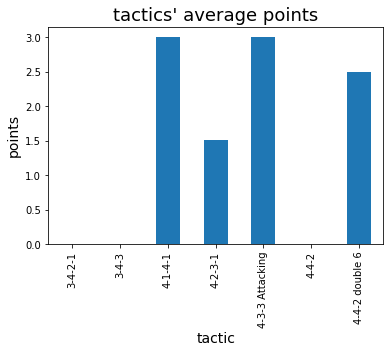

In [70]:
df.groupby('tactic')['points'].mean().plot(kind='bar');
plt.title('tactics\' average points', fontsize=18)
plt.ylabel('points', fontsize=14)
plt.xlabel('tactic', fontsize=14)

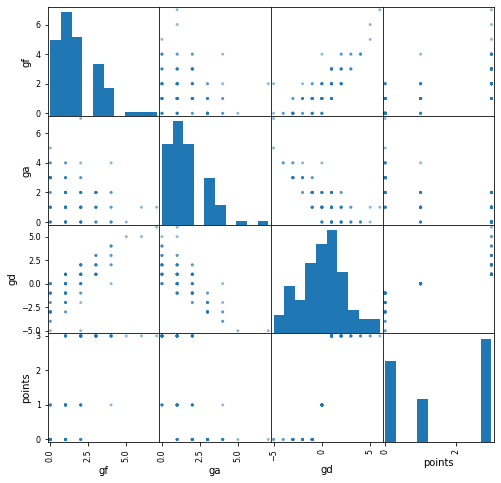

In [63]:
pd.plotting.scatter_matrix(df, figsize = (8,8));

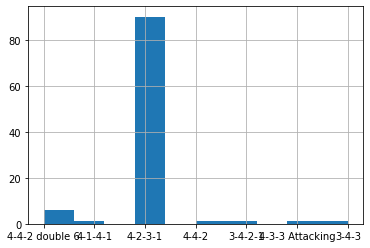

In [65]:
df.tactic.hist();

In [72]:
df.groupby('tactic')['ga'].mean()

tactic
3-4-2-1            3.0
3-4-3              1.0
4-1-4-1            1.0
4-2-3-1            1.6
4-3-3 Attacking    0.0
4-4-2              2.0
4-4-2 double 6     1.0
Name: ga, dtype: float64

In [98]:
tacdf=df.groupby('tactic')['res'].value_counts().to_frame()


In [108]:
tacdf["tactic","result"]=tacdf.index

In [122]:
tacdf['tactic']=tacdf["tactic", "result"].apply(lambda x:x[0])
tacdf['result']=tacdf["tactic", "result"].apply(lambda x:x[1])

In [130]:
tacdf.drop(tacdf.columns[1],axis = 1,inplace=True)

In [139]:
tacdf.rename({'res':'count'},axis=1,inplace=True)

In [137]:
tacdf.index= np.arange(0,len(tacdf['result']),1)

In [140]:
tacdf

,count,tactic,result
0,1,3-4-2-1,l
1,1,3-4-3,l
2,1,4-1-4-1,w
3,39,4-2-3-1,w
4,32,4-2-3-1,l
5,19,4-2-3-1,d
6,1,4-3-3 Attacking,w
7,1,4-4-2,l
8,5,4-4-2 double 6,w
9,1,4-4-2 double 6,l


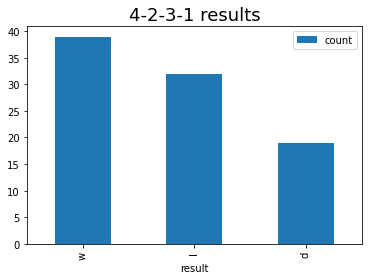

In [144]:
tacdf.query('tactic == "4-2-3-1"').plot(kind='bar',x='result',y='count');
plt.title('4-2-3-1 results' ,fontsize=18)
plt.legend()
plt.show()


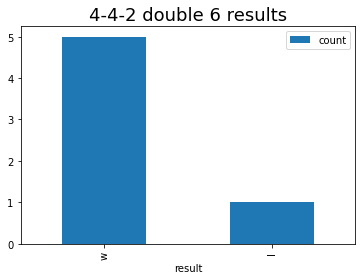

In [146]:
tacdf.query('tactic == "4-4-2 double 6"').plot(kind='bar',x='result',y='count');
plt.title('4-4-2 double 6 results' ,fontsize=18)
plt.legend()
plt.show()